<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/8_AdvancedTrainingConcepts/experiments/Cifar10_with_resnet34_BN_RedLR/Cifar10_with_resnet34_BN_RedLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [10]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-2lc96jrb
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-2lc96jrb
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98531 sha256=0280877ce77004edfefe841ff749b92cfecb97106e090ad355d70208c947740f
  Stored in directory: /tmp/pip-ephem-wheel-cache-p_q7em1t/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations


In [11]:
!git clone https://github.com/gkdivya/torch_cv_wrapper.git

fatal: destination path 'torch_cv_wrapper' already exists and is not an empty directory.


In [12]:
!git clone https://github.com/gkdivya/eva.git

fatal: destination path 'eva' already exists and is not an empty directory.


In [13]:
from __future__ import print_function
import torchvision
import torch
from pprint import pprint
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

## Import Custom Libraries
from torch_cv_wrapper.utils import plot_metrics,train,test,helper
from torch_cv_wrapper.utils.gradcam import generate_gradcam, plot_gradcam
from torch_cv_wrapper.model import resnet
from torch_cv_wrapper.main import TriggerEngine

## Load config file

In [14]:
config = helper.process_config("/content/eva/8_AdvancedTrainingConcepts/experiments/Cifar10_with_resnet34_BN_RedLR/config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'type': 'CIFAR10Albumentation'},
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
                             'ship',
                             'truck'],
                 'type': 'Cifar10DataLoader'},
 'lr_scheduler': 'ReduceLROnPlateau',
 'model': 'Resnet34',
 'model_params': {'dropout': 0.05,
                  'experiment_name': 'Cifar10_with_resnet34_BN_RedLR',
                  'model_dir': './model/',
                  'seed': 1},
 'optimizer': {'args': {'lr': 0.001}, 'type': 'optim.Adam'},
 'training_

## Create Training Instance

In [15]:
exp_metrics={}
experiment_name=config['model_params']['experiment_name']
trigger_training=TriggerEngine(config)

## Download data and view sample images

In [16]:
classes= config['data_loader']['classes']

#Get dataloaders
train_loader,test_loader = trigger_training.dataloader()

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


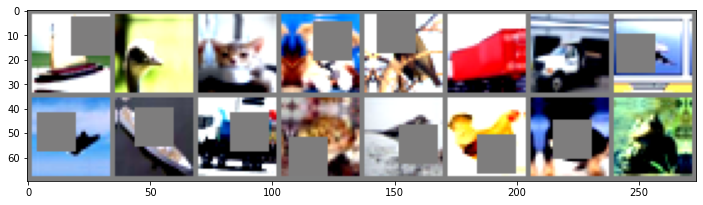

In [17]:
# get some random training images
images, labels = iter(train_loader).next()

# # show images
helper.imshow(torchvision.utils.make_grid(images[:16]))

## Model Summary

In [18]:
model = resnet.ResNet34("BN")
model.to(device)
trigger_training.model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1, 64,

## Trigger training

In [19]:
# trigger_training.
(exp_metrics[experiment_name]) = trigger_training.run_experiment(model,train_loader,test_loader)
#trigger_training.save_experiment(model,experiment_name,"/content/drive/MyDrive/Cifar10_Resnet/saved_models")

  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1:


Loss=1.611816167831421 Batch_id=195 LR=0.00100 Accuracy=34.42: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 3775/10000 (37.75%)

Epoch 2:


Loss=1.3466746807098389 Batch_id=195 LR=0.00100 Accuracy=47.29: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 4912/10000 (49.12%)

Epoch 3:


Loss=1.3586926460266113 Batch_id=195 LR=0.00100 Accuracy=55.40: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 5569/10000 (55.69%)

Epoch 4:


Loss=1.2007052898406982 Batch_id=195 LR=0.00100 Accuracy=61.24: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6379/10000 (63.79%)

Epoch 5:


Loss=0.8730271458625793 Batch_id=195 LR=0.00100 Accuracy=64.94: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6840/10000 (68.40%)

Epoch 6:


Loss=1.0757839679718018 Batch_id=195 LR=0.00100 Accuracy=68.17: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6668/10000 (66.68%)

Epoch 7:


Loss=0.800497829914093 Batch_id=195 LR=0.00100 Accuracy=70.94: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6937/10000 (69.37%)

Epoch 8:


Loss=0.9168750643730164 Batch_id=195 LR=0.00100 Accuracy=72.64: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7394/10000 (73.94%)

Epoch 9:


Loss=0.6029812097549438 Batch_id=195 LR=0.00100 Accuracy=74.75: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7655/10000 (76.55%)

Epoch 10:


Loss=0.7321146130561829 Batch_id=195 LR=0.00100 Accuracy=76.22: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7530/10000 (75.30%)

Epoch 11:


Loss=0.5712167024612427 Batch_id=195 LR=0.00100 Accuracy=77.65: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7410/10000 (74.10%)

Epoch 12:


Loss=0.6761624217033386 Batch_id=195 LR=0.00100 Accuracy=78.86: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8139/10000 (81.39%)

Epoch 13:


Loss=0.5820445418357849 Batch_id=195 LR=0.00100 Accuracy=79.88: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7603/10000 (76.03%)

Epoch 14:


Loss=0.6135998964309692 Batch_id=195 LR=0.00100 Accuracy=80.71: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7675/10000 (76.75%)

Epoch 15:


Loss=0.5637334585189819 Batch_id=195 LR=0.00100 Accuracy=81.69: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8252/10000 (82.52%)

Epoch 16:


Loss=0.5143700838088989 Batch_id=195 LR=0.00100 Accuracy=82.20: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8095/10000 (80.95%)

Epoch 17:


Loss=0.5074793696403503 Batch_id=195 LR=0.00100 Accuracy=83.18: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8327/10000 (83.27%)

Epoch 18:


Loss=0.6773039102554321 Batch_id=195 LR=0.00100 Accuracy=83.59: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8512/10000 (85.12%)

Epoch 19:


Loss=0.36230313777923584 Batch_id=195 LR=0.00100 Accuracy=84.11: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8648/10000 (86.48%)

Epoch 20:


Loss=0.405522882938385 Batch_id=195 LR=0.00100 Accuracy=84.69: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8550/10000 (85.50%)

Epoch 21:


Loss=0.45021694898605347 Batch_id=195 LR=0.00100 Accuracy=85.04: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8556/10000 (85.56%)

Epoch 22:


Loss=0.4612964689731598 Batch_id=195 LR=0.00100 Accuracy=85.60: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8737/10000 (87.37%)

Epoch 23:


Loss=0.40923815965652466 Batch_id=195 LR=0.00100 Accuracy=86.02: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8651/10000 (86.51%)

Epoch 24:


Loss=0.28982481360435486 Batch_id=195 LR=0.00100 Accuracy=86.39: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8463/10000 (84.63%)

Epoch 25:


Loss=0.3196869492530823 Batch_id=195 LR=0.00100 Accuracy=86.91: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8438/10000 (84.38%)

Epoch 26:


Loss=0.38400736451148987 Batch_id=195 LR=0.00100 Accuracy=87.36: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8627/10000 (86.27%)

Epoch    26: reducing learning rate of group 0 to 2.0000e-04.
Epoch 27:


Loss=0.17080660164356232 Batch_id=195 LR=0.00020 Accuracy=90.62: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 9139/10000 (91.39%)

Epoch 28:


Loss=0.09727273881435394 Batch_id=195 LR=0.00020 Accuracy=91.70: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 9163/10000 (91.63%)

Epoch 29:


Loss=0.23744599521160126 Batch_id=195 LR=0.00020 Accuracy=92.15: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 9172/10000 (91.72%)

Epoch 30:


Loss=0.2360120713710785 Batch_id=195 LR=0.00020 Accuracy=92.39: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 9185/10000 (91.85%)

Epoch 31:


Loss=0.15959516167640686 Batch_id=195 LR=0.00020 Accuracy=92.72: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 9195/10000 (91.95%)

Epoch 32:


Loss=0.3492127060890198 Batch_id=195 LR=0.00020 Accuracy=92.80: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 9175/10000 (91.75%)

Epoch 33:


Loss=0.17481228709220886 Batch_id=195 LR=0.00020 Accuracy=92.86: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9159/10000 (91.59%)

Epoch 34:


Loss=0.1829199194908142 Batch_id=195 LR=0.00020 Accuracy=93.37: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 9136/10000 (91.36%)

Epoch 35:


Loss=0.2322624921798706 Batch_id=195 LR=0.00020 Accuracy=93.48: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9196/10000 (91.96%)

Epoch 36:


Loss=0.25994059443473816 Batch_id=195 LR=0.00020 Accuracy=93.67: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9185/10000 (91.85%)

Epoch 37:


Loss=0.22147545218467712 Batch_id=195 LR=0.00020 Accuracy=93.66: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9196/10000 (91.96%)

Epoch 38:


Loss=0.2836785912513733 Batch_id=195 LR=0.00020 Accuracy=93.83: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9197/10000 (91.97%)

Epoch 39:


Loss=0.33522218465805054 Batch_id=195 LR=0.00020 Accuracy=93.91: 100%|██████████| 196/196 [01:48<00:00,  1.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 9204/10000 (92.04%)

Epoch 40:


Loss=0.23791079223155975 Batch_id=195 LR=0.00020 Accuracy=94.14: 100%|██████████| 196/196 [01:48<00:00,  1.81it/s]



Test set: Average loss: 0.0011, Accuracy: 9239/10000 (92.39%)



## Missclassification

Total wrong predictions are 761
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


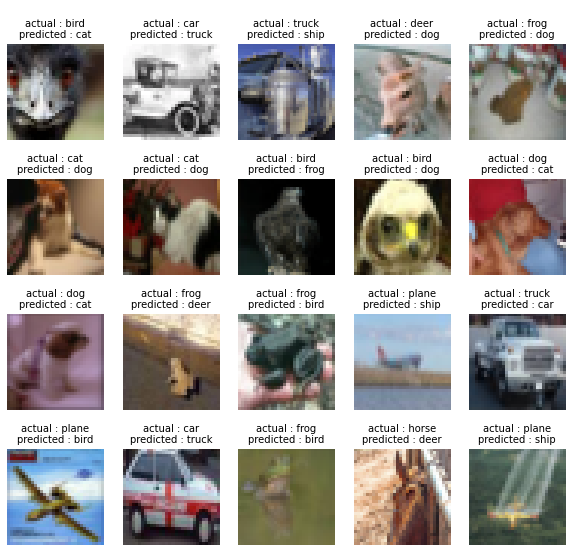

In [20]:
misclassified_images = trigger_training.wrong_predictions(model,test_loader)

## Plots for Validation Loss and Accuracy

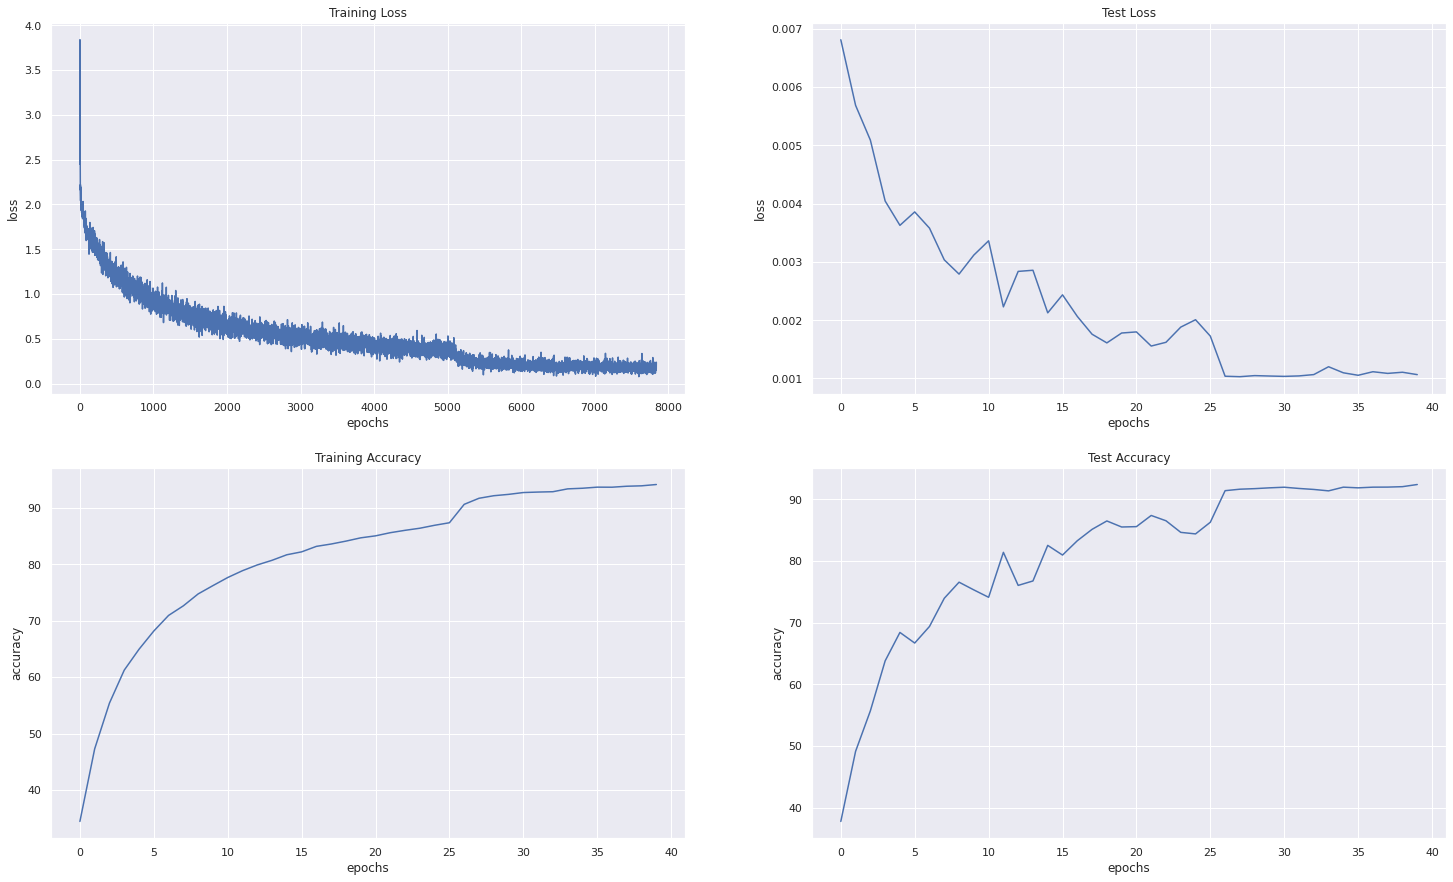

In [21]:
plot_metrics.plot_metrics(exp_metrics[experiment_name])

## Accuracy for each class

In [22]:
helper.class_level_accuracy(model, test_loader, device, classes)

Accuracy of plane : 92 %
Accuracy of   car : 95 %
Accuracy of  bird : 88 %
Accuracy of   cat : 84 %
Accuracy of  deer : 92 %
Accuracy of   dog : 87 %
Accuracy of  frog : 95 %
Accuracy of horse : 93 %
Accuracy of  ship : 97 %
Accuracy of truck : 96 %


## Plot Confusion Matrix

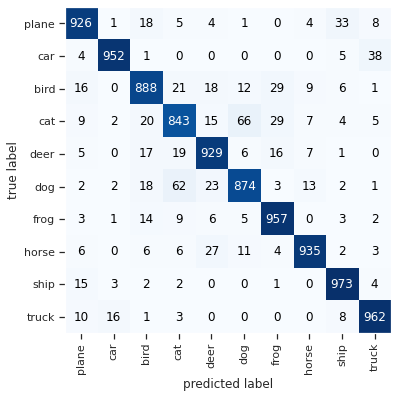

In [23]:
mat = helper.compute_confusion_matrix(model,test_loader,device)
plot_metrics.plot_confusion_matrix(mat, class_names=classes)


## Generate & Plot GradCam Images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


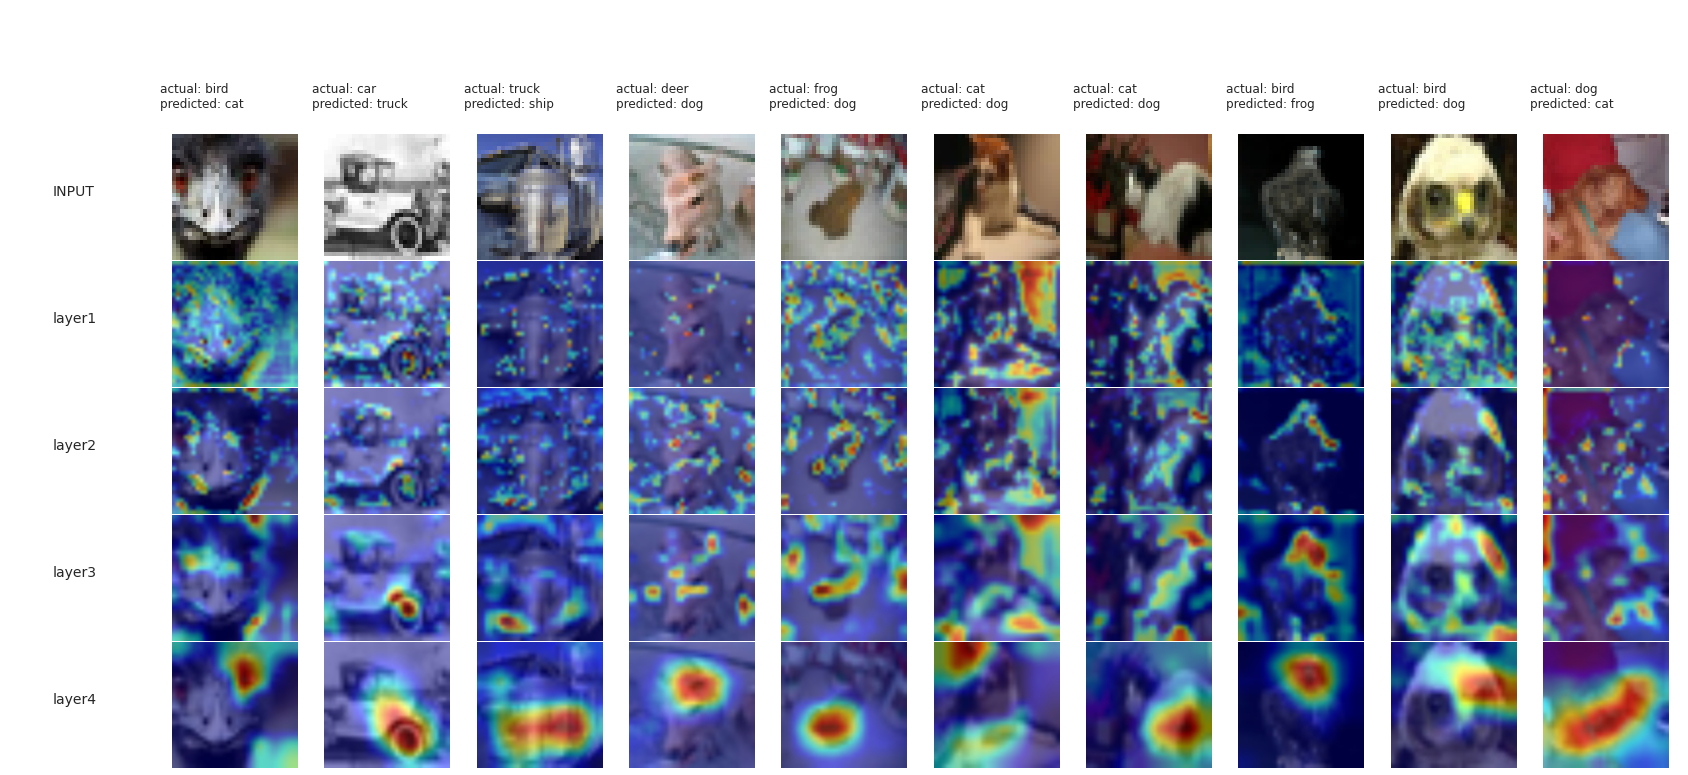

In [24]:
target_layers = ["layer1","layer2","layer3","layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(misclassified_images[:10], model, target_layers,device)
plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[:10])

In [ ]:
gradcam_output, probs, predicted_classes = generate_gradcam(misclassified_images[10:20], model, target_layers,device)
plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[10:20])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


In [ ]:

%load_ext tensorboard
%tensorboard --logdir=runs